# Introduction

In this notebook, I will play with FuzzyMarketState python class, testing all its features.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# import requires packages
# Append relative path to FuzzyMarketState.py
import sys
sys.path.append('..')

from FuzzyMarketState import FuzzyMarketState

import plotly
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.graph_objs import *
from plotly.tools import FigureFactory as FF
import plotly.tools as tls
plotly.offline.init_notebook_mode(connected=True)

import logging
logging.basicConfig(level=logging.DEBUG, stream=sys.stdout)

import random

print('Packages loaded!!')

Packages loaded!!
DEBUG:matplotlib.pyplot:Loaded backend module://ipykernel.pylab.backend_inline version unknown.


In [3]:
# Create object
fms = FuzzyMarketState(logging.WARN)

In [4]:
# load dataframe
df = fms.loadCSV('../csv_data/EURUSD_H4.csv', sep=';')

## Zigzag and Bollinger indicators

In [7]:
# build zigzag indicator
df = fms.buildZigzag(df, minbars=12, bb_period=20, bb_dev=2.0, nan_value=0.0)


In [8]:
# load dataframe with zigzag into fms and plot the zigzag trace
fms.loadDataframe(df)
zz_traces = fms.plotZigzag('black')
py.iplot(zz_traces, filename='simple_ohlc')

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): plot.ly:443
DEBUG:urllib3.connectionpool:https://plot.ly:443 "POST /clientresp HTTP/1.1" 200 None


In [10]:
# plots Bollinger indicators associated with zigzag
fig, bb_traces = fms.plotBollinger(['black', 'blue', 'red'])
py.iplot(fig, filename='simple_ohlc')

This is the format of your plot grid:
[ (1,1) x1,y1 ]
[ (2,1) x1,y2 ]
[ (3,1) x1,y3 ]

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): plot.ly:443
DEBUG:urllib3.connectionpool:https://plot.ly:443 "POST /clientresp HTTP/1.1" 200 None


### Oscillators: MACD and RSI

In [11]:
result = fms.buildOscillators(fms.getDataframe(), macd_applied='CLOSE', macd_fast=12, macd_slow=26, macd_sig=9, rsi_applied='CLOSE', rsi_period=14)

In [12]:
fig,osc_traces = fms.plotOscillators(color=['blue','red','green'])
py.iplot(fig, filename='simple_ohlc')

This is the format of your plot grid:
[ (1,1) x1,y1 ]
[ (2,1) x1,y2 ]
[ (3,1) x1,y3 ]

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): plot.ly:443
DEBUG:urllib3.connectionpool:https://plot.ly:443 "POST /clientresp HTTP/1.1" 200 None


### Moving Averages Fast-Medium-Slow

In [13]:
# build moving averages
result = fms.build3MovingAverages(fms.getDataframe(), 
                                  ma_fast_applied='CLOSE', ma_fast_period=50, ma_fast_type='SMA', 
                                  ma_mid_applied='CLOSE', ma_mid_period=100, ma_mid_type='SMA', 
                                  ma_slow_applied='CLOSE', ma_slow_period=200, ma_slow_type='SMA',
                                  trend_filters={'price-slow': 0.5, 'price-mid': 0.3, 'price-fast': 0.2})

In [15]:
# plot moving averages
fig, ma_traces, ma_shapes = fms.plotMovingAverages(color=['blue', 'red', 'green'])
#-------------
#def zoom(layout, xrange):
#    in_view = df.loc[fig.layout.xaxis.range[0]:fig.layout.xaxis.range[1]]
#    fig.layout.yaxis.range = [in_view.High.min() - 10, in_view.High.max() + 10]
#fig.layout.on_change(zoom, 'xaxis.range')
py.iplot(fig, filename='simple_ohlc')

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): plot.ly:443
DEBUG:urllib3.connectionpool:https://plot.ly:443 "POST /clientresp HTTP/1.1" 200 None


### Fibonacci levels

In [16]:
# build common fibo levels (both retracements and extensions)
fms.buildCommonFiboLevels(fms.getDataframe(), nan_value=0.0)

In [17]:
# plot fibo levels for a given sample
length =  fms.getDataframe().shape[0]
x = random.randint(int(length/2), length)
fibo_traces, fibo_annotations, fibo_shapes = fms.plotFiboLevels(at=x, width=100, color='black')
fig = go.Figure(data=[fibo_traces])
fig['layout'].update(height=600, title='FiboLevels at {}'.format(x))
fig['layout'].update(annotations=fibo_annotations)
fig['layout'].update(shapes=fibo_shapes)
def zoom(layout, xrange):
    in_view = df.loc[fig.layout.xaxis.range[0]:fig.layout.xaxis.range[1]]
    fig.layout.yaxis.range = [in_view.High.min() - 10, in_view.High.max() + 10]
fig.layout.on_change(zoom, 'xaxis.range')
py.iplot(fig, filename='simple_ohlc')

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): plot.ly:443
DEBUG:urllib3.connectionpool:https://plot.ly:443 "POST /clientresp HTTP/1.1" 200 None


### Supports & Resistances

In [18]:
# build supports and resistances levels from last trend zigzags
_supports = fms.buildSupports(fms.getDataframe())

(6182, 6138)

In [19]:
# plot supports levels for samples x1 and x2
s = _supports
s = s[s != 0.0]
x1 = s.index.values[-1]
x2 = s.index.values[-2]

trace_ohlc,s1_shape=fms.plotHorizontalLine(x1+1, x1, x1+100, s.iloc[-1], color='brown', width=2, dash='dashdot')
_,s2_shape=fms.plotHorizontalLine(x2+1, x2, x2+100, s.iloc[-2], color='violet', width=2, dash='dashdot')
fig = go.Figure(data=[trace_ohlc])
fig['layout'].update(height=600, title='Supports at {},{}'.format(x1+1,x2+1))
fig['layout'].update(shapes=[s1_shape, s2_shape])
#-------------
def zoom(layout, xrange):
    in_view = df.loc[fig.layout.xaxis.range[0]:fig.layout.xaxis.range[1]]
    fig.layout.yaxis.range = [in_view.High.min() - 10, in_view.High.max() + 10]
fig.layout.on_change(zoom, 'xaxis.range')
py.iplot(fig, filename='simple_ohlc')

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): plot.ly:443
DEBUG:urllib3.connectionpool:https://plot.ly:443 "POST /clientresp HTTP/1.1" 200 None


In [20]:
# build supports and resistances levels from last trend zigzags
_resist = fms.buildResistances(fms.getDataframe(), nan_value=0.0)


In [21]:
# plot supports levels for samples x1 and x2
r = _resist
r = r[r != 0.0]
x1 = r.index.values[-1]
x2 = r.index.values[-2]

trace_ohlc,r1_shape=fms.plotHorizontalLine(at=x1+1, x0=x1, x1=x1+100, value=r.iloc[-1], color='brown', width=2, dash='dashdot')
_,r2_shape=fms.plotHorizontalLine(x2+1, x2, x2+100, r.iloc[-2], color='violet', width=2, dash='dashdot')
fig = go.Figure(data=[trace_ohlc])
fig['layout'].update(height=600, title='Resistances at {},{}'.format(x1+1,x2+1))
fig['layout'].update(shapes=[r1_shape, r2_shape])
#-------------
def zoom(layout, xrange):
    in_view = df.loc[fig.layout.xaxis.range[0]:fig.layout.xaxis.range[1]]
    fig.layout.yaxis.range = [in_view.High.min() - 10, in_view.High.max() + 10]
fig.layout.on_change(zoom, 'xaxis.range')
py.iplot(fig, filename='simple_ohlc')

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): plot.ly:443
DEBUG:urllib3.connectionpool:https://plot.ly:443 "POST /clientresp HTTP/1.1" 200 None


### Channels

In [22]:
# build channel lines
_channel = fms.buildChannel(fms.getDataframe(), nan_value='')

In [23]:
# plot channel lines for sample _ux or _bx
_upperline = _channel['channel_upper_limit']
_bottomline = _channel['channel_lower_limit']
_upperline = _upperline[_upperline != '']
_bottomline = _bottomline[_bottomline != '']
_ux = _upperline.index.values[-1]
_bx = _bottomline.index.values[-1]
_ulast = _upperline.iloc[-1]
_blast = _bottomline.iloc[-1]

x = _ux+1
trace_ohlc, ch_shapes = fms.plotChannel(x, extended=100, color='black', width=1, dash='dashdot')
fig = go.Figure(data=[trace_ohlc])
fig['layout'].update(height=600, title='Channel at {}'.format(x))
fig['layout'].update(shapes=ch_shapes)
#-------------
def zoom(layout, xrange):
    in_view = df.loc[fig.layout.xaxis.range[0]:fig.layout.xaxis.range[1]]
    fig.layout.yaxis.range = [in_view.High.min() - 10, in_view.High.max() + 10]
fig.layout.on_change(zoom, 'xaxis.range')
py.iplot(fig, filename='simple_ohlc')

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): plot.ly:443
DEBUG:urllib3.connectionpool:https://plot.ly:443 "POST /clientresp HTTP/1.1" 200 None


### Trends

In [24]:
# build trends with different filters
filters = {'sma-trend':0.75, 'zigzag-trend':0.15, 'fibo-trend':0.1}
_trends = fms.buildTrends(fms.getDataframe(), filters = filters, nan_value=0.0)

In [26]:
# plot trends
fig, trace_ohlc, trend_shapes = fms.plotTrends(nan_value=0.0)
py.iplot(fig, filename='simple_ohlc')

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): plot.ly:443
DEBUG:urllib3.connectionpool:https://plot.ly:443 "POST /clientresp HTTP/1.1" 200 None


In [50]:
fms.getDataframe()['MACD_main']

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
5            NaN
6            NaN
7            NaN
8            NaN
9            NaN
10           NaN
11           NaN
12           NaN
13           NaN
14           NaN
15           NaN
16           NaN
17           NaN
18           NaN
19           NaN
20           NaN
21           NaN
22           NaN
23           NaN
24           NaN
25           NaN
26           NaN
27           NaN
28           NaN
29           NaN
          ...   
6776   -0.000335
6777   -0.000221
6778   -0.000392
6779   -0.000604
6780   -0.000797
6781   -0.000923
6782   -0.000978
6783   -0.001051
6784   -0.001080
6785   -0.001184
6786   -0.001303
6787   -0.001334
6788   -0.001425
6789   -0.001469
6790   -0.001419
6791   -0.001327
6792   -0.001262
6793   -0.001201
6794   -0.001177
6795   -0.001249
6796   -0.001208
6797   -0.001142
6798   -0.001078
6799   -0.001008
6800   -0.000986
6801   -0.000925
6802   -0.000807
6803   -0.0007

### Divergences

In [68]:
# build divergences
fms.setLoggingLevel(logging.DEBUG)
_bullish_div, _bearish_div = fms.buildDivergences(fms.getDataframe(), nan_value=0.0)

DEBUG:FuzzyMarketState:Logging level changed to 10
DEBUG:FuzzyMarketState:row [0]: error-zzpoints-count
DEBUG:FuzzyMarketState:row [1]: error-zzpoints-count
DEBUG:FuzzyMarketState:row [2]: error-zzpoints-count
DEBUG:FuzzyMarketState:row [3]: error-zzpoints-count
DEBUG:FuzzyMarketState:row [4]: error-zzpoints-count
DEBUG:FuzzyMarketState:row [5]: error-zzpoints-count
DEBUG:FuzzyMarketState:row [6]: error-zzpoints-count
DEBUG:FuzzyMarketState:row [7]: error-zzpoints-count
DEBUG:FuzzyMarketState:row [8]: error-zzpoints-count
DEBUG:FuzzyMarketState:row [9]: error-zzpoints-count
DEBUG:FuzzyMarketState:row [10]: error-zzpoints-count
DEBUG:FuzzyMarketState:row [11]: error-zzpoints-count
DEBUG:FuzzyMarketState:row [12]: error-zzpoints-count
DEBUG:FuzzyMarketState:row [13]: error-zzpoints-count
DEBUG:FuzzyMarketState:row [14]: error-zzpoints-count
DEBUG:FuzzyMarketState:row [15]: error-zzpoints-count
DEBUG:FuzzyMarketState:row [16]: error-zzpoints-count
DEBUG:FuzzyMarketState:row [17]: error-zz

DEBUG:FuzzyMarketState:row [145]: last is MIN p0=145, p1=139, p2=112, p3=76, p4=58, p5=44, p6=0 error-p6_isNaN 
DEBUG:FuzzyMarketState:row [146]: last is MIN p0=146, p1=139, p2=112, p3=76, p4=58, p5=44, p6=0 error-p6_isNaN 
DEBUG:FuzzyMarketState:row [147]: last is MIN p0=147, p1=139, p2=112, p3=76, p4=58, p5=44, p6=0 error-p6_isNaN 
DEBUG:FuzzyMarketState:row [148]: last is MIN p0=148, p1=139, p2=112, p3=76, p4=58, p5=44, p6=0 error-p6_isNaN 
DEBUG:FuzzyMarketState:row [149]: last is MIN p0=149, p1=139, p2=112, p3=76, p4=58, p5=44, p6=0 error-p6_isNaN 
DEBUG:FuzzyMarketState:row [150]: last is MIN p0=150, p1=139, p2=112, p3=76, p4=58, p5=44, p6=0 error-p6_isNaN 
DEBUG:FuzzyMarketState:row [151]: last is MIN p0=151, p1=139, p2=112, p3=76, p4=58, p5=44, p6=0 error-p6_isNaN 
DEBUG:FuzzyMarketState:row [152]: last is MIN p0=152, p1=139, p2=112, p3=76, p4=58, p5=44, p6=0 error-p6_isNaN 
DEBUG:FuzzyMarketState:row [153]: last is MIN p0=153, p1=139, p2=112, p3=76, p4=58, p5=44, p6=0 error-p6

ERROR:FuzzyMarketState:row [177]: last is MAX p0=177, p1=172, p2=139, p3=112, p4=76, p5=58, p6=44 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bull_div.to=0 .from=0 .doubfrom=0 error-NaN reg_bull_div.to=0 .from=0 .doubfrom=0 
DEBUG:FuzzyMarketState:row [177]: last is MAX p0=177, p1=172, p2=139, p3=112, p4=76, p5=58, p6=44 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bull_div.to=0 .from=0 .doubfrom=0 error-NaN reg_bull_div.to=0 .from=0 .doubfrom=0 
ERROR:FuzzyMarketState:row [178]: last is MAX p0=178, p1=172, p2=139, p3=112, p4=76, p5=58, p6=44 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 
ERROR:FuzzyMarketState:row [178]: last is MAX p0=178, p1=172, p2=139, p3=112, p4=76, p5=58, p6=44 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bear_div.to=0 .from=0 .doubfrom=0 
ERROR:FuzzyMarketState:row [178]: last is MAX p0=178, p1=172, p2=139, p3=112

DEBUG:FuzzyMarketState:row [184]: last is MAX p0=184, p1=172, p2=139, p3=112, p4=76, p5=58, p6=44 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bull_div.to=0 .from=0 .doubfrom=0 error-NaN reg_bull_div.to=0 .from=0 .doubfrom=0 
ERROR:FuzzyMarketState:row [185]: last is MAX p0=185, p1=172, p2=139, p3=112, p4=76, p5=58, p6=44 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 
ERROR:FuzzyMarketState:row [185]: last is MAX p0=185, p1=172, p2=139, p3=112, p4=76, p5=58, p6=44 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bear_div.to=0 .from=0 .doubfrom=0 
ERROR:FuzzyMarketState:row [185]: last is MAX p0=185, p1=172, p2=139, p3=112, p4=76, p5=58, p6=44 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bull_div.to=0 .from=0 .doubfrom=0 
ERROR:FuzzyMarketState:row [185]: last is MAX p0=185, p1=172, p2=139, p3=112, p4=76, p5=58, p6=44 error-NaN reg_bear_div.to=

ERROR:FuzzyMarketState:row [192]: last is MAX p0=192, p1=172, p2=139, p3=112, p4=76, p5=58, p6=44 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 
ERROR:FuzzyMarketState:row [192]: last is MAX p0=192, p1=172, p2=139, p3=112, p4=76, p5=58, p6=44 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bear_div.to=0 .from=0 .doubfrom=0 
ERROR:FuzzyMarketState:row [192]: last is MAX p0=192, p1=172, p2=139, p3=112, p4=76, p5=58, p6=44 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bull_div.to=0 .from=0 .doubfrom=0 
ERROR:FuzzyMarketState:row [192]: last is MAX p0=192, p1=172, p2=139, p3=112, p4=76, p5=58, p6=44 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bull_div.to=0 .from=0 .doubfrom=0 error-NaN reg_bull_div.to=0 .from=0 .doubfrom=0 
DEBUG:FuzzyMarketState:row [192]: last is MAX p0=192, p1=172, p2=139, p3=112, p4=76, p5=58, p6=44 error-NaN reg_bear_div.to=

ERROR:FuzzyMarketState:row [199]: last is MAX p0=199, p1=172, p2=139, p3=112, p4=76, p5=58, p6=44 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bear_div.to=0 .from=0 .doubfrom=0 
ERROR:FuzzyMarketState:row [199]: last is MAX p0=199, p1=172, p2=139, p3=112, p4=76, p5=58, p6=44 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bull_div.to=0 .from=0 .doubfrom=0 
ERROR:FuzzyMarketState:row [199]: last is MAX p0=199, p1=172, p2=139, p3=112, p4=76, p5=58, p6=44 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bull_div.to=0 .from=0 .doubfrom=0 error-NaN reg_bull_div.to=0 .from=0 .doubfrom=0 
DEBUG:FuzzyMarketState:row [199]: last is MAX p0=199, p1=172, p2=139, p3=112, p4=76, p5=58, p6=44 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bull_div.to=0 .from=0 .doubfrom=0 error-NaN reg_bull_div.to=0 .

ERROR:FuzzyMarketState:row [206]: last is MAX p0=206, p1=172, p2=139, p3=112, p4=76, p5=58, p6=44 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bull_div.to=0 .from=0 .doubfrom=0 
ERROR:FuzzyMarketState:row [206]: last is MAX p0=206, p1=172, p2=139, p3=112, p4=76, p5=58, p6=44 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bull_div.to=0 .from=0 .doubfrom=0 error-NaN reg_bull_div.to=0 .from=0 .doubfrom=0 
DEBUG:FuzzyMarketState:row [206]: last is MAX p0=206, p1=172, p2=139, p3=112, p4=76, p5=58, p6=44 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bull_div.to=0 .from=0 .doubfrom=0 error-NaN reg_bull_div.to=0 .from=0 .doubfrom=0 
ERROR:FuzzyMarketState:row [207]: last is MAX p0=207, p1=172, p2=139, p3=112, p4=76, p5=58, p6=44 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 
ERROR:FuzzyMarketState:row [

ERROR:FuzzyMarketState:row [213]: last is MAX p0=213, p1=172, p2=139, p3=112, p4=76, p5=58, p6=44 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bull_div.to=0 .from=0 .doubfrom=0 error-NaN reg_bull_div.to=0 .from=0 .doubfrom=0 
DEBUG:FuzzyMarketState:row [213]: last is MAX p0=213, p1=172, p2=139, p3=112, p4=76, p5=58, p6=44 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bull_div.to=0 .from=0 .doubfrom=0 error-NaN reg_bull_div.to=0 .from=0 .doubfrom=0 
ERROR:FuzzyMarketState:row [214]: last is MAX p0=214, p1=172, p2=139, p3=112, p4=76, p5=58, p6=44 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 
ERROR:FuzzyMarketState:row [214]: last is MAX p0=214, p1=172, p2=139, p3=112, p4=76, p5=58, p6=44 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bear_div.to=0 .from=0 .doubfrom=0 
ERROR:FuzzyMarketState:row [214]: last is MAX p0=214, p1=172, p2=139, p3=112

DEBUG:FuzzyMarketState:row [220]: last is MAX p0=220, p1=172, p2=139, p3=112, p4=76, p5=58, p6=44 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bull_div.to=0 .from=0 .doubfrom=0 error-NaN reg_bull_div.to=0 .from=0 .doubfrom=0 
ERROR:FuzzyMarketState:row [221]: last is MAX p0=221, p1=172, p2=139, p3=112, p4=76, p5=58, p6=44 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 
ERROR:FuzzyMarketState:row [221]: last is MAX p0=221, p1=172, p2=139, p3=112, p4=76, p5=58, p6=44 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bear_div.to=0 .from=0 .doubfrom=0 
ERROR:FuzzyMarketState:row [221]: last is MAX p0=221, p1=172, p2=139, p3=112, p4=76, p5=58, p6=44 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bull_div.to=0 .from=0 .doubfrom=0 
ERROR:FuzzyMarketState:row [221]: last is MAX p0=221, p1=172, p2=139, p3=112, p4=76, p5=58, p6=44 error-NaN reg_bear_div.to=

ERROR:FuzzyMarketState:row [228]: last is MAX p0=228, p1=172, p2=139, p3=112, p4=76, p5=58, p6=44 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 
ERROR:FuzzyMarketState:row [228]: last is MAX p0=228, p1=172, p2=139, p3=112, p4=76, p5=58, p6=44 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bear_div.to=0 .from=0 .doubfrom=0 
ERROR:FuzzyMarketState:row [228]: last is MAX p0=228, p1=172, p2=139, p3=112, p4=76, p5=58, p6=44 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bull_div.to=0 .from=0 .doubfrom=0 
ERROR:FuzzyMarketState:row [228]: last is MAX p0=228, p1=172, p2=139, p3=112, p4=76, p5=58, p6=44 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bull_div.to=0 .from=0 .doubfrom=0 error-NaN reg_bull_div.to=0 .from=0 .doubfrom=0 
DEBUG:FuzzyMarketState:row [228]: last is MAX p0=228, p1=172, p2=139, p3=112, p4=76, p5=58, p6=44 error-NaN reg_bear_div.to=

ERROR:FuzzyMarketState:row [235]: last is MAX p0=235, p1=172, p2=139, p3=112, p4=76, p5=58, p6=44 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bear_div.to=0 .from=0 .doubfrom=0 
ERROR:FuzzyMarketState:row [235]: last is MAX p0=235, p1=172, p2=139, p3=112, p4=76, p5=58, p6=44 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bull_div.to=0 .from=0 .doubfrom=0 
ERROR:FuzzyMarketState:row [235]: last is MAX p0=235, p1=172, p2=139, p3=112, p4=76, p5=58, p6=44 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bull_div.to=0 .from=0 .doubfrom=0 error-NaN reg_bull_div.to=0 .from=0 .doubfrom=0 
DEBUG:FuzzyMarketState:row [235]: last is MAX p0=235, p1=172, p2=139, p3=112, p4=76, p5=58, p6=44 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bull_div.to=0 .from=0 .doubfrom=0 error-NaN reg_bull_div.to=0 .

ERROR:FuzzyMarketState:row [242]: last is MAX p0=242, p1=172, p2=139, p3=112, p4=76, p5=58, p6=44 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bull_div.to=0 .from=0 .doubfrom=0 
ERROR:FuzzyMarketState:row [242]: last is MAX p0=242, p1=172, p2=139, p3=112, p4=76, p5=58, p6=44 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bull_div.to=0 .from=0 .doubfrom=0 error-NaN reg_bull_div.to=0 .from=0 .doubfrom=0 
DEBUG:FuzzyMarketState:row [242]: last is MAX p0=242, p1=172, p2=139, p3=112, p4=76, p5=58, p6=44 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bull_div.to=0 .from=0 .doubfrom=0 error-NaN reg_bull_div.to=0 .from=0 .doubfrom=0 
ERROR:FuzzyMarketState:row [243]: last is MAX p0=243, p1=172, p2=139, p3=112, p4=76, p5=58, p6=44 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 
ERROR:FuzzyMarketState:row [

ERROR:FuzzyMarketState:row [249]: last is MAX p0=249, p1=172, p2=139, p3=112, p4=76, p5=58, p6=44 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bull_div.to=0 .from=0 .doubfrom=0 error-NaN reg_bull_div.to=0 .from=0 .doubfrom=0 
DEBUG:FuzzyMarketState:row [249]: last is MAX p0=249, p1=172, p2=139, p3=112, p4=76, p5=58, p6=44 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bull_div.to=0 .from=0 .doubfrom=0 error-NaN reg_bull_div.to=0 .from=0 .doubfrom=0 
ERROR:FuzzyMarketState:row [250]: last is MAX p0=250, p1=172, p2=139, p3=112, p4=76, p5=58, p6=44 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 
ERROR:FuzzyMarketState:row [250]: last is MAX p0=250, p1=172, p2=139, p3=112, p4=76, p5=58, p6=44 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bear_div.to=0 .from=0 .doubfrom=0 
ERROR:FuzzyMarketState:row [250]: last is MAX p0=250, p1=172, p2=139, p3=112

DEBUG:FuzzyMarketState:row [256]: last is MAX p0=256, p1=172, p2=139, p3=112, p4=76, p5=58, p6=44 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bull_div.to=0 .from=0 .doubfrom=0 error-NaN reg_bull_div.to=0 .from=0 .doubfrom=0 
ERROR:FuzzyMarketState:row [257]: last is MAX p0=257, p1=172, p2=139, p3=112, p4=76, p5=58, p6=44 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 
ERROR:FuzzyMarketState:row [257]: last is MAX p0=257, p1=172, p2=139, p3=112, p4=76, p5=58, p6=44 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bear_div.to=0 .from=0 .doubfrom=0 
ERROR:FuzzyMarketState:row [257]: last is MAX p0=257, p1=172, p2=139, p3=112, p4=76, p5=58, p6=44 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bull_div.to=0 .from=0 .doubfrom=0 
ERROR:FuzzyMarketState:row [257]: last is MAX p0=257, p1=172, p2=139, p3=112, p4=76, p5=58, p6=44 error-NaN reg_bear_div.to=

ERROR:FuzzyMarketState:row [264]: last is MAX p0=264, p1=172, p2=139, p3=112, p4=76, p5=58, p6=44 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 
ERROR:FuzzyMarketState:row [264]: last is MAX p0=264, p1=172, p2=139, p3=112, p4=76, p5=58, p6=44 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bear_div.to=0 .from=0 .doubfrom=0 
ERROR:FuzzyMarketState:row [264]: last is MAX p0=264, p1=172, p2=139, p3=112, p4=76, p5=58, p6=44 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bull_div.to=0 .from=0 .doubfrom=0 
ERROR:FuzzyMarketState:row [264]: last is MAX p0=264, p1=172, p2=139, p3=112, p4=76, p5=58, p6=44 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bull_div.to=0 .from=0 .doubfrom=0 error-NaN reg_bull_div.to=0 .from=0 .doubfrom=0 
DEBUG:FuzzyMarketState:row [264]: last is MAX p0=264, p1=172, p2=139, p3=112, p4=76, p5=58, p6=44 error-NaN reg_bear_div.to=

ERROR:FuzzyMarketState:row [271]: last is MAX p0=271, p1=172, p2=139, p3=112, p4=76, p5=58, p6=44 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bear_div.to=0 .from=0 .doubfrom=0 
ERROR:FuzzyMarketState:row [271]: last is MAX p0=271, p1=172, p2=139, p3=112, p4=76, p5=58, p6=44 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bull_div.to=0 .from=0 .doubfrom=0 
ERROR:FuzzyMarketState:row [271]: last is MAX p0=271, p1=172, p2=139, p3=112, p4=76, p5=58, p6=44 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bull_div.to=0 .from=0 .doubfrom=0 error-NaN reg_bull_div.to=0 .from=0 .doubfrom=0 
DEBUG:FuzzyMarketState:row [271]: last is MAX p0=271, p1=172, p2=139, p3=112, p4=76, p5=58, p6=44 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bull_div.to=0 .from=0 .doubfrom=0 error-NaN reg_bull_div.to=0 .

ERROR:FuzzyMarketState:row [278]: last is MAX p0=278, p1=172, p2=139, p3=112, p4=76, p5=58, p6=44 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bull_div.to=0 .from=0 .doubfrom=0 
ERROR:FuzzyMarketState:row [278]: last is MAX p0=278, p1=172, p2=139, p3=112, p4=76, p5=58, p6=44 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bull_div.to=0 .from=0 .doubfrom=0 error-NaN reg_bull_div.to=0 .from=0 .doubfrom=0 
DEBUG:FuzzyMarketState:row [278]: last is MAX p0=278, p1=172, p2=139, p3=112, p4=76, p5=58, p6=44 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bull_div.to=0 .from=0 .doubfrom=0 error-NaN reg_bull_div.to=0 .from=0 .doubfrom=0 
ERROR:FuzzyMarketState:row [279]: last is MAX p0=279, p1=172, p2=139, p3=112, p4=76, p5=58, p6=44 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 
ERROR:FuzzyMarketState:row [

ERROR:FuzzyMarketState:row [285]: last is MAX p0=285, p1=172, p2=139, p3=112, p4=76, p5=58, p6=44 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bull_div.to=0 .from=0 .doubfrom=0 error-NaN reg_bull_div.to=0 .from=0 .doubfrom=0 
DEBUG:FuzzyMarketState:row [285]: last is MAX p0=285, p1=172, p2=139, p3=112, p4=76, p5=58, p6=44 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bull_div.to=0 .from=0 .doubfrom=0 error-NaN reg_bull_div.to=0 .from=0 .doubfrom=0 
ERROR:FuzzyMarketState:row [286]: last is MIN p0=286, p1=285, p2=172, p3=139, p4=112, p5=76, p6=58 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 
ERROR:FuzzyMarketState:row [286]: last is MIN p0=286, p1=285, p2=172, p3=139, p4=112, p5=76, p6=58 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bear_div.to=0 .from=0 .doubfrom=0 
ERROR:FuzzyMarketState:row [286]: last is MIN p0=286, p1=285, p2=172, p3=1

ERROR:FuzzyMarketState:row [292]: last is MIN p0=292, p1=285, p2=172, p3=139, p4=112, p5=76, p6=58 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bull_div.to=0 .from=0 .doubfrom=0 error-NaN reg_bull_div.to=285 .from=139 .doubfrom=76 
DEBUG:FuzzyMarketState:row [292]: last is MIN p0=292, p1=285, p2=172, p3=139, p4=112, p5=76, p6=58 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bull_div.to=0 .from=0 .doubfrom=0 error-NaN reg_bull_div.to=285 .from=139 .doubfrom=76 
ERROR:FuzzyMarketState:row [293]: last is MIN p0=293, p1=285, p2=172, p3=139, p4=112, p5=76, p6=58 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 
ERROR:FuzzyMarketState:row [293]: last is MIN p0=293, p1=285, p2=172, p3=139, p4=112, p5=76, p6=58 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bear_div.to=0 .from=0 .doubfrom=0 
ERROR:FuzzyMarketState:row [293]: last is MIN p0=293, p1=285, 

ERROR:FuzzyMarketState:row [299]: last is MIN p0=299, p1=285, p2=172, p3=139, p4=112, p5=76, p6=58 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bull_div.to=0 .from=0 .doubfrom=0 error-NaN reg_bull_div.to=285 .from=139 .doubfrom=76 
DEBUG:FuzzyMarketState:row [299]: last is MIN p0=299, p1=285, p2=172, p3=139, p4=112, p5=76, p6=58 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bull_div.to=0 .from=0 .doubfrom=0 error-NaN reg_bull_div.to=285 .from=139 .doubfrom=76 
ERROR:FuzzyMarketState:row [300]: last is MIN p0=300, p1=285, p2=172, p3=139, p4=112, p5=76, p6=58 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 
ERROR:FuzzyMarketState:row [300]: last is MIN p0=300, p1=285, p2=172, p3=139, p4=112, p5=76, p6=58 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bear_div.to=0 .from=0 .doubfrom=0 
ERROR:FuzzyMarketState:row [300]: last is MIN p0=300, p1=285, 

ERROR:FuzzyMarketState:row [306]: last is MIN p0=306, p1=285, p2=172, p3=139, p4=112, p5=76, p6=58 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bull_div.to=0 .from=0 .doubfrom=0 error-NaN reg_bull_div.to=285 .from=139 .doubfrom=76 
DEBUG:FuzzyMarketState:row [306]: last is MIN p0=306, p1=285, p2=172, p3=139, p4=112, p5=76, p6=58 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bull_div.to=0 .from=0 .doubfrom=0 error-NaN reg_bull_div.to=285 .from=139 .doubfrom=76 
ERROR:FuzzyMarketState:row [307]: last is MIN p0=307, p1=285, p2=172, p3=139, p4=112, p5=76, p6=58 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 
ERROR:FuzzyMarketState:row [307]: last is MIN p0=307, p1=285, p2=172, p3=139, p4=112, p5=76, p6=58 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bear_div.to=0 .from=0 .doubfrom=0 
ERROR:FuzzyMarketState:row [307]: last is MIN p0=307, p1=285, 

ERROR:FuzzyMarketState:row [313]: last is MIN p0=313, p1=285, p2=172, p3=139, p4=112, p5=76, p6=58 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bull_div.to=0 .from=0 .doubfrom=0 error-NaN reg_bull_div.to=285 .from=139 .doubfrom=76 
DEBUG:FuzzyMarketState:row [313]: last is MIN p0=313, p1=285, p2=172, p3=139, p4=112, p5=76, p6=58 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bull_div.to=0 .from=0 .doubfrom=0 error-NaN reg_bull_div.to=285 .from=139 .doubfrom=76 
ERROR:FuzzyMarketState:row [314]: last is MIN p0=314, p1=285, p2=172, p3=139, p4=112, p5=76, p6=58 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 
ERROR:FuzzyMarketState:row [314]: last is MIN p0=314, p1=285, p2=172, p3=139, p4=112, p5=76, p6=58 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bear_div.to=0 .from=0 .doubfrom=0 
ERROR:FuzzyMarketState:row [314]: last is MIN p0=314, p1=285, 

ERROR:FuzzyMarketState:row [320]: last is MIN p0=320, p1=285, p2=172, p3=139, p4=112, p5=76, p6=58 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bull_div.to=0 .from=0 .doubfrom=0 error-NaN reg_bull_div.to=285 .from=139 .doubfrom=76 
DEBUG:FuzzyMarketState:row [320]: last is MIN p0=320, p1=285, p2=172, p3=139, p4=112, p5=76, p6=58 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bull_div.to=0 .from=0 .doubfrom=0 error-NaN reg_bull_div.to=285 .from=139 .doubfrom=76 
ERROR:FuzzyMarketState:row [321]: last is MIN p0=321, p1=285, p2=172, p3=139, p4=112, p5=76, p6=58 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 
ERROR:FuzzyMarketState:row [321]: last is MIN p0=321, p1=285, p2=172, p3=139, p4=112, p5=76, p6=58 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bear_div.to=0 .from=0 .doubfrom=0 
ERROR:FuzzyMarketState:row [321]: last is MIN p0=321, p1=285, 

ERROR:FuzzyMarketState:row [327]: last is MIN p0=327, p1=285, p2=172, p3=139, p4=112, p5=76, p6=58 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bull_div.to=0 .from=0 .doubfrom=0 error-NaN reg_bull_div.to=285 .from=139 .doubfrom=76 
DEBUG:FuzzyMarketState:row [327]: last is MIN p0=327, p1=285, p2=172, p3=139, p4=112, p5=76, p6=58 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bull_div.to=0 .from=0 .doubfrom=0 error-NaN reg_bull_div.to=285 .from=139 .doubfrom=76 
ERROR:FuzzyMarketState:row [328]: last is MIN p0=328, p1=285, p2=172, p3=139, p4=112, p5=76, p6=58 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 
ERROR:FuzzyMarketState:row [328]: last is MIN p0=328, p1=285, p2=172, p3=139, p4=112, p5=76, p6=58 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bear_div.to=0 .from=0 .doubfrom=0 
ERROR:FuzzyMarketState:row [328]: last is MIN p0=328, p1=285, 

ERROR:FuzzyMarketState:row [334]: last is MIN p0=334, p1=285, p2=172, p3=139, p4=112, p5=76, p6=58 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bull_div.to=0 .from=0 .doubfrom=0 error-NaN reg_bull_div.to=285 .from=139 .doubfrom=76 
DEBUG:FuzzyMarketState:row [334]: last is MIN p0=334, p1=285, p2=172, p3=139, p4=112, p5=76, p6=58 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bull_div.to=0 .from=0 .doubfrom=0 error-NaN reg_bull_div.to=285 .from=139 .doubfrom=76 
ERROR:FuzzyMarketState:row [335]: last is MAX p0=335, p1=334, p2=285, p3=172, p4=139, p5=112, p6=76 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 
ERROR:FuzzyMarketState:row [335]: last is MAX p0=335, p1=334, p2=285, p3=172, p4=139, p5=112, p6=76 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bear_div.to=334 .from=172 .doubfrom=112 
DEBUG:FuzzyMarketState:row [0]: error-zzpoints-count
D

DEBUG:FuzzyMarketState:row [134]: error-zzpoints-count
DEBUG:FuzzyMarketState:row [135]: error-zzpoints-count
DEBUG:FuzzyMarketState:row [136]: error-zzpoints-count
DEBUG:FuzzyMarketState:row [137]: error-zzpoints-count
DEBUG:FuzzyMarketState:row [138]: error-zzpoints-count
DEBUG:FuzzyMarketState:row [139]: error-zzpoints-count
DEBUG:FuzzyMarketState:row [140]: last is MIN p0=140, p1=139, p2=112, p3=76, p4=58, p5=44, p6=0 error-p6_isNaN 
DEBUG:FuzzyMarketState:row [141]: last is MIN p0=141, p1=139, p2=112, p3=76, p4=58, p5=44, p6=0 error-p6_isNaN 
DEBUG:FuzzyMarketState:row [142]: last is MIN p0=142, p1=139, p2=112, p3=76, p4=58, p5=44, p6=0 error-p6_isNaN 
DEBUG:FuzzyMarketState:row [143]: last is MIN p0=143, p1=139, p2=112, p3=76, p4=58, p5=44, p6=0 error-p6_isNaN 
DEBUG:FuzzyMarketState:row [144]: last is MIN p0=144, p1=139, p2=112, p3=76, p4=58, p5=44, p6=0 error-p6_isNaN 
DEBUG:FuzzyMarketState:row [145]: last is MIN p0=145, p1=139, p2=112, p3=76, p4=58, p5=44, p6=0 error-p6_isNaN

DEBUG:FuzzyMarketState:row [176]: last is MAX p0=176, p1=172, p2=139, p3=112, p4=76, p5=58, p6=44 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bull_div.to=0 .from=0 .doubfrom=0 error-NaN reg_bull_div.to=0 .from=0 .doubfrom=0 
ERROR:FuzzyMarketState:row [177]: last is MAX p0=177, p1=172, p2=139, p3=112, p4=76, p5=58, p6=44 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 
ERROR:FuzzyMarketState:row [177]: last is MAX p0=177, p1=172, p2=139, p3=112, p4=76, p5=58, p6=44 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bear_div.to=0 .from=0 .doubfrom=0 
ERROR:FuzzyMarketState:row [177]: last is MAX p0=177, p1=172, p2=139, p3=112, p4=76, p5=58, p6=44 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bull_div.to=0 .from=0 .doubfrom=0 
ERROR:FuzzyMarketState:row [177]: last is MAX p0=177, p1=172, p2=139, p3=112, p4=76, p5=58, p6=44 error-NaN reg_bear_div.to=

ERROR:FuzzyMarketState:row [184]: last is MAX p0=184, p1=172, p2=139, p3=112, p4=76, p5=58, p6=44 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 
ERROR:FuzzyMarketState:row [184]: last is MAX p0=184, p1=172, p2=139, p3=112, p4=76, p5=58, p6=44 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bear_div.to=0 .from=0 .doubfrom=0 
ERROR:FuzzyMarketState:row [184]: last is MAX p0=184, p1=172, p2=139, p3=112, p4=76, p5=58, p6=44 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bull_div.to=0 .from=0 .doubfrom=0 
ERROR:FuzzyMarketState:row [184]: last is MAX p0=184, p1=172, p2=139, p3=112, p4=76, p5=58, p6=44 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bull_div.to=0 .from=0 .doubfrom=0 error-NaN reg_bull_div.to=0 .from=0 .doubfrom=0 
DEBUG:FuzzyMarketState:row [184]: last is MAX p0=184, p1=172, p2=139, p3=112, p4=76, p5=58, p6=44 error-NaN reg_bear_div.to=

ERROR:FuzzyMarketState:row [191]: last is MAX p0=191, p1=172, p2=139, p3=112, p4=76, p5=58, p6=44 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bear_div.to=0 .from=0 .doubfrom=0 
ERROR:FuzzyMarketState:row [191]: last is MAX p0=191, p1=172, p2=139, p3=112, p4=76, p5=58, p6=44 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bull_div.to=0 .from=0 .doubfrom=0 
ERROR:FuzzyMarketState:row [191]: last is MAX p0=191, p1=172, p2=139, p3=112, p4=76, p5=58, p6=44 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bull_div.to=0 .from=0 .doubfrom=0 error-NaN reg_bull_div.to=0 .from=0 .doubfrom=0 
DEBUG:FuzzyMarketState:row [191]: last is MAX p0=191, p1=172, p2=139, p3=112, p4=76, p5=58, p6=44 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bull_div.to=0 .from=0 .doubfrom=0 error-NaN reg_bull_div.to=0 .

ERROR:FuzzyMarketState:row [198]: last is MAX p0=198, p1=172, p2=139, p3=112, p4=76, p5=58, p6=44 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bull_div.to=0 .from=0 .doubfrom=0 
ERROR:FuzzyMarketState:row [198]: last is MAX p0=198, p1=172, p2=139, p3=112, p4=76, p5=58, p6=44 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bull_div.to=0 .from=0 .doubfrom=0 error-NaN reg_bull_div.to=0 .from=0 .doubfrom=0 
DEBUG:FuzzyMarketState:row [198]: last is MAX p0=198, p1=172, p2=139, p3=112, p4=76, p5=58, p6=44 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bull_div.to=0 .from=0 .doubfrom=0 error-NaN reg_bull_div.to=0 .from=0 .doubfrom=0 
ERROR:FuzzyMarketState:row [199]: last is MAX p0=199, p1=172, p2=139, p3=112, p4=76, p5=58, p6=44 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 
ERROR:FuzzyMarketState:row [

ERROR:FuzzyMarketState:row [205]: last is MAX p0=205, p1=172, p2=139, p3=112, p4=76, p5=58, p6=44 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bull_div.to=0 .from=0 .doubfrom=0 error-NaN reg_bull_div.to=0 .from=0 .doubfrom=0 
DEBUG:FuzzyMarketState:row [205]: last is MAX p0=205, p1=172, p2=139, p3=112, p4=76, p5=58, p6=44 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bull_div.to=0 .from=0 .doubfrom=0 error-NaN reg_bull_div.to=0 .from=0 .doubfrom=0 
ERROR:FuzzyMarketState:row [206]: last is MAX p0=206, p1=172, p2=139, p3=112, p4=76, p5=58, p6=44 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 
ERROR:FuzzyMarketState:row [206]: last is MAX p0=206, p1=172, p2=139, p3=112, p4=76, p5=58, p6=44 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bear_div.to=0 .from=0 .doubfrom=0 
ERROR:FuzzyMarketState:row [206]: last is MAX p0=206, p1=172, p2=139, p3=112

DEBUG:FuzzyMarketState:row [212]: last is MAX p0=212, p1=172, p2=139, p3=112, p4=76, p5=58, p6=44 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bull_div.to=0 .from=0 .doubfrom=0 error-NaN reg_bull_div.to=0 .from=0 .doubfrom=0 
ERROR:FuzzyMarketState:row [213]: last is MAX p0=213, p1=172, p2=139, p3=112, p4=76, p5=58, p6=44 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 
ERROR:FuzzyMarketState:row [213]: last is MAX p0=213, p1=172, p2=139, p3=112, p4=76, p5=58, p6=44 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bear_div.to=0 .from=0 .doubfrom=0 
ERROR:FuzzyMarketState:row [213]: last is MAX p0=213, p1=172, p2=139, p3=112, p4=76, p5=58, p6=44 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bull_div.to=0 .from=0 .doubfrom=0 
ERROR:FuzzyMarketState:row [213]: last is MAX p0=213, p1=172, p2=139, p3=112, p4=76, p5=58, p6=44 error-NaN reg_bear_div.to=

ERROR:FuzzyMarketState:row [220]: last is MAX p0=220, p1=172, p2=139, p3=112, p4=76, p5=58, p6=44 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 
ERROR:FuzzyMarketState:row [220]: last is MAX p0=220, p1=172, p2=139, p3=112, p4=76, p5=58, p6=44 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bear_div.to=0 .from=0 .doubfrom=0 
ERROR:FuzzyMarketState:row [220]: last is MAX p0=220, p1=172, p2=139, p3=112, p4=76, p5=58, p6=44 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bull_div.to=0 .from=0 .doubfrom=0 
ERROR:FuzzyMarketState:row [220]: last is MAX p0=220, p1=172, p2=139, p3=112, p4=76, p5=58, p6=44 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bull_div.to=0 .from=0 .doubfrom=0 error-NaN reg_bull_div.to=0 .from=0 .doubfrom=0 
DEBUG:FuzzyMarketState:row [220]: last is MAX p0=220, p1=172, p2=139, p3=112, p4=76, p5=58, p6=44 error-NaN reg_bear_div.to=

ERROR:FuzzyMarketState:row [227]: last is MAX p0=227, p1=172, p2=139, p3=112, p4=76, p5=58, p6=44 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bear_div.to=0 .from=0 .doubfrom=0 
ERROR:FuzzyMarketState:row [227]: last is MAX p0=227, p1=172, p2=139, p3=112, p4=76, p5=58, p6=44 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bull_div.to=0 .from=0 .doubfrom=0 
ERROR:FuzzyMarketState:row [227]: last is MAX p0=227, p1=172, p2=139, p3=112, p4=76, p5=58, p6=44 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bull_div.to=0 .from=0 .doubfrom=0 error-NaN reg_bull_div.to=0 .from=0 .doubfrom=0 
DEBUG:FuzzyMarketState:row [227]: last is MAX p0=227, p1=172, p2=139, p3=112, p4=76, p5=58, p6=44 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bull_div.to=0 .from=0 .doubfrom=0 error-NaN reg_bull_div.to=0 .

ERROR:FuzzyMarketState:row [234]: last is MAX p0=234, p1=172, p2=139, p3=112, p4=76, p5=58, p6=44 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bull_div.to=0 .from=0 .doubfrom=0 
ERROR:FuzzyMarketState:row [234]: last is MAX p0=234, p1=172, p2=139, p3=112, p4=76, p5=58, p6=44 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bull_div.to=0 .from=0 .doubfrom=0 error-NaN reg_bull_div.to=0 .from=0 .doubfrom=0 
DEBUG:FuzzyMarketState:row [234]: last is MAX p0=234, p1=172, p2=139, p3=112, p4=76, p5=58, p6=44 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bull_div.to=0 .from=0 .doubfrom=0 error-NaN reg_bull_div.to=0 .from=0 .doubfrom=0 
ERROR:FuzzyMarketState:row [235]: last is MAX p0=235, p1=172, p2=139, p3=112, p4=76, p5=58, p6=44 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 
ERROR:FuzzyMarketState:row [

ERROR:FuzzyMarketState:row [241]: last is MAX p0=241, p1=172, p2=139, p3=112, p4=76, p5=58, p6=44 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bull_div.to=0 .from=0 .doubfrom=0 error-NaN reg_bull_div.to=0 .from=0 .doubfrom=0 
DEBUG:FuzzyMarketState:row [241]: last is MAX p0=241, p1=172, p2=139, p3=112, p4=76, p5=58, p6=44 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bull_div.to=0 .from=0 .doubfrom=0 error-NaN reg_bull_div.to=0 .from=0 .doubfrom=0 
ERROR:FuzzyMarketState:row [242]: last is MAX p0=242, p1=172, p2=139, p3=112, p4=76, p5=58, p6=44 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 
ERROR:FuzzyMarketState:row [242]: last is MAX p0=242, p1=172, p2=139, p3=112, p4=76, p5=58, p6=44 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bear_div.to=0 .from=0 .doubfrom=0 
ERROR:FuzzyMarketState:row [242]: last is MAX p0=242, p1=172, p2=139, p3=112

DEBUG:FuzzyMarketState:row [248]: last is MAX p0=248, p1=172, p2=139, p3=112, p4=76, p5=58, p6=44 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bull_div.to=0 .from=0 .doubfrom=0 error-NaN reg_bull_div.to=0 .from=0 .doubfrom=0 
ERROR:FuzzyMarketState:row [249]: last is MAX p0=249, p1=172, p2=139, p3=112, p4=76, p5=58, p6=44 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 
ERROR:FuzzyMarketState:row [249]: last is MAX p0=249, p1=172, p2=139, p3=112, p4=76, p5=58, p6=44 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bear_div.to=0 .from=0 .doubfrom=0 
ERROR:FuzzyMarketState:row [249]: last is MAX p0=249, p1=172, p2=139, p3=112, p4=76, p5=58, p6=44 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bull_div.to=0 .from=0 .doubfrom=0 
ERROR:FuzzyMarketState:row [249]: last is MAX p0=249, p1=172, p2=139, p3=112, p4=76, p5=58, p6=44 error-NaN reg_bear_div.to=

ERROR:FuzzyMarketState:row [256]: last is MAX p0=256, p1=172, p2=139, p3=112, p4=76, p5=58, p6=44 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 
ERROR:FuzzyMarketState:row [256]: last is MAX p0=256, p1=172, p2=139, p3=112, p4=76, p5=58, p6=44 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bear_div.to=0 .from=0 .doubfrom=0 
ERROR:FuzzyMarketState:row [256]: last is MAX p0=256, p1=172, p2=139, p3=112, p4=76, p5=58, p6=44 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bull_div.to=0 .from=0 .doubfrom=0 
ERROR:FuzzyMarketState:row [256]: last is MAX p0=256, p1=172, p2=139, p3=112, p4=76, p5=58, p6=44 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bull_div.to=0 .from=0 .doubfrom=0 error-NaN reg_bull_div.to=0 .from=0 .doubfrom=0 
DEBUG:FuzzyMarketState:row [256]: last is MAX p0=256, p1=172, p2=139, p3=112, p4=76, p5=58, p6=44 error-NaN reg_bear_div.to=

ERROR:FuzzyMarketState:row [263]: last is MAX p0=263, p1=172, p2=139, p3=112, p4=76, p5=58, p6=44 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bear_div.to=0 .from=0 .doubfrom=0 
ERROR:FuzzyMarketState:row [263]: last is MAX p0=263, p1=172, p2=139, p3=112, p4=76, p5=58, p6=44 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bull_div.to=0 .from=0 .doubfrom=0 
ERROR:FuzzyMarketState:row [263]: last is MAX p0=263, p1=172, p2=139, p3=112, p4=76, p5=58, p6=44 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bull_div.to=0 .from=0 .doubfrom=0 error-NaN reg_bull_div.to=0 .from=0 .doubfrom=0 
DEBUG:FuzzyMarketState:row [263]: last is MAX p0=263, p1=172, p2=139, p3=112, p4=76, p5=58, p6=44 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bull_div.to=0 .from=0 .doubfrom=0 error-NaN reg_bull_div.to=0 .

ERROR:FuzzyMarketState:row [270]: last is MAX p0=270, p1=172, p2=139, p3=112, p4=76, p5=58, p6=44 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bull_div.to=0 .from=0 .doubfrom=0 
ERROR:FuzzyMarketState:row [270]: last is MAX p0=270, p1=172, p2=139, p3=112, p4=76, p5=58, p6=44 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bull_div.to=0 .from=0 .doubfrom=0 error-NaN reg_bull_div.to=0 .from=0 .doubfrom=0 
DEBUG:FuzzyMarketState:row [270]: last is MAX p0=270, p1=172, p2=139, p3=112, p4=76, p5=58, p6=44 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bull_div.to=0 .from=0 .doubfrom=0 error-NaN reg_bull_div.to=0 .from=0 .doubfrom=0 
ERROR:FuzzyMarketState:row [271]: last is MAX p0=271, p1=172, p2=139, p3=112, p4=76, p5=58, p6=44 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 
ERROR:FuzzyMarketState:row [

ERROR:FuzzyMarketState:row [277]: last is MAX p0=277, p1=172, p2=139, p3=112, p4=76, p5=58, p6=44 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bull_div.to=0 .from=0 .doubfrom=0 error-NaN reg_bull_div.to=0 .from=0 .doubfrom=0 
DEBUG:FuzzyMarketState:row [277]: last is MAX p0=277, p1=172, p2=139, p3=112, p4=76, p5=58, p6=44 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bull_div.to=0 .from=0 .doubfrom=0 error-NaN reg_bull_div.to=0 .from=0 .doubfrom=0 
ERROR:FuzzyMarketState:row [278]: last is MAX p0=278, p1=172, p2=139, p3=112, p4=76, p5=58, p6=44 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 
ERROR:FuzzyMarketState:row [278]: last is MAX p0=278, p1=172, p2=139, p3=112, p4=76, p5=58, p6=44 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bear_div.to=0 .from=0 .doubfrom=0 
ERROR:FuzzyMarketState:row [278]: last is MAX p0=278, p1=172, p2=139, p3=112

DEBUG:FuzzyMarketState:row [284]: last is MAX p0=284, p1=172, p2=139, p3=112, p4=76, p5=58, p6=44 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bull_div.to=0 .from=0 .doubfrom=0 error-NaN reg_bull_div.to=0 .from=0 .doubfrom=0 
ERROR:FuzzyMarketState:row [285]: last is MAX p0=285, p1=172, p2=139, p3=112, p4=76, p5=58, p6=44 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 
ERROR:FuzzyMarketState:row [285]: last is MAX p0=285, p1=172, p2=139, p3=112, p4=76, p5=58, p6=44 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bear_div.to=0 .from=0 .doubfrom=0 
ERROR:FuzzyMarketState:row [285]: last is MAX p0=285, p1=172, p2=139, p3=112, p4=76, p5=58, p6=44 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bull_div.to=0 .from=0 .doubfrom=0 
ERROR:FuzzyMarketState:row [285]: last is MAX p0=285, p1=172, p2=139, p3=112, p4=76, p5=58, p6=44 error-NaN reg_bear_div.to=

DEBUG:FuzzyMarketState:row [291]: last is MIN p0=291, p1=285, p2=172, p3=139, p4=112, p5=76, p6=58 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bull_div.to=0 .from=0 .doubfrom=0 error-NaN reg_bull_div.to=285 .from=139 .doubfrom=76 
ERROR:FuzzyMarketState:row [292]: last is MIN p0=292, p1=285, p2=172, p3=139, p4=112, p5=76, p6=58 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 
ERROR:FuzzyMarketState:row [292]: last is MIN p0=292, p1=285, p2=172, p3=139, p4=112, p5=76, p6=58 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bear_div.to=0 .from=0 .doubfrom=0 
ERROR:FuzzyMarketState:row [292]: last is MIN p0=292, p1=285, p2=172, p3=139, p4=112, p5=76, p6=58 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bull_div.to=0 .from=0 .doubfrom=0 
ERROR:FuzzyMarketState:row [292]: last is MIN p0=292, p1=285, p2=172, p3=139, p4=112, p5=76, p6=58 error-NaN reg_be

DEBUG:FuzzyMarketState:row [298]: last is MIN p0=298, p1=285, p2=172, p3=139, p4=112, p5=76, p6=58 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bull_div.to=0 .from=0 .doubfrom=0 error-NaN reg_bull_div.to=285 .from=139 .doubfrom=76 
ERROR:FuzzyMarketState:row [299]: last is MIN p0=299, p1=285, p2=172, p3=139, p4=112, p5=76, p6=58 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 
ERROR:FuzzyMarketState:row [299]: last is MIN p0=299, p1=285, p2=172, p3=139, p4=112, p5=76, p6=58 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bear_div.to=0 .from=0 .doubfrom=0 
ERROR:FuzzyMarketState:row [299]: last is MIN p0=299, p1=285, p2=172, p3=139, p4=112, p5=76, p6=58 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bull_div.to=0 .from=0 .doubfrom=0 
ERROR:FuzzyMarketState:row [299]: last is MIN p0=299, p1=285, p2=172, p3=139, p4=112, p5=76, p6=58 error-NaN reg_be

DEBUG:FuzzyMarketState:row [305]: last is MIN p0=305, p1=285, p2=172, p3=139, p4=112, p5=76, p6=58 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bull_div.to=0 .from=0 .doubfrom=0 error-NaN reg_bull_div.to=285 .from=139 .doubfrom=76 
ERROR:FuzzyMarketState:row [306]: last is MIN p0=306, p1=285, p2=172, p3=139, p4=112, p5=76, p6=58 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 
ERROR:FuzzyMarketState:row [306]: last is MIN p0=306, p1=285, p2=172, p3=139, p4=112, p5=76, p6=58 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bear_div.to=0 .from=0 .doubfrom=0 
ERROR:FuzzyMarketState:row [306]: last is MIN p0=306, p1=285, p2=172, p3=139, p4=112, p5=76, p6=58 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bull_div.to=0 .from=0 .doubfrom=0 
ERROR:FuzzyMarketState:row [306]: last is MIN p0=306, p1=285, p2=172, p3=139, p4=112, p5=76, p6=58 error-NaN reg_be

DEBUG:FuzzyMarketState:row [312]: last is MIN p0=312, p1=285, p2=172, p3=139, p4=112, p5=76, p6=58 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bull_div.to=0 .from=0 .doubfrom=0 error-NaN reg_bull_div.to=285 .from=139 .doubfrom=76 
ERROR:FuzzyMarketState:row [313]: last is MIN p0=313, p1=285, p2=172, p3=139, p4=112, p5=76, p6=58 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 
ERROR:FuzzyMarketState:row [313]: last is MIN p0=313, p1=285, p2=172, p3=139, p4=112, p5=76, p6=58 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bear_div.to=0 .from=0 .doubfrom=0 
ERROR:FuzzyMarketState:row [313]: last is MIN p0=313, p1=285, p2=172, p3=139, p4=112, p5=76, p6=58 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bull_div.to=0 .from=0 .doubfrom=0 
ERROR:FuzzyMarketState:row [313]: last is MIN p0=313, p1=285, p2=172, p3=139, p4=112, p5=76, p6=58 error-NaN reg_be

DEBUG:FuzzyMarketState:row [319]: last is MIN p0=319, p1=285, p2=172, p3=139, p4=112, p5=76, p6=58 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bull_div.to=0 .from=0 .doubfrom=0 error-NaN reg_bull_div.to=285 .from=139 .doubfrom=76 
ERROR:FuzzyMarketState:row [320]: last is MIN p0=320, p1=285, p2=172, p3=139, p4=112, p5=76, p6=58 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 
ERROR:FuzzyMarketState:row [320]: last is MIN p0=320, p1=285, p2=172, p3=139, p4=112, p5=76, p6=58 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bear_div.to=0 .from=0 .doubfrom=0 
ERROR:FuzzyMarketState:row [320]: last is MIN p0=320, p1=285, p2=172, p3=139, p4=112, p5=76, p6=58 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bull_div.to=0 .from=0 .doubfrom=0 
ERROR:FuzzyMarketState:row [320]: last is MIN p0=320, p1=285, p2=172, p3=139, p4=112, p5=76, p6=58 error-NaN reg_be

DEBUG:FuzzyMarketState:row [326]: last is MIN p0=326, p1=285, p2=172, p3=139, p4=112, p5=76, p6=58 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bull_div.to=0 .from=0 .doubfrom=0 error-NaN reg_bull_div.to=285 .from=139 .doubfrom=76 
ERROR:FuzzyMarketState:row [327]: last is MIN p0=327, p1=285, p2=172, p3=139, p4=112, p5=76, p6=58 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 
ERROR:FuzzyMarketState:row [327]: last is MIN p0=327, p1=285, p2=172, p3=139, p4=112, p5=76, p6=58 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bear_div.to=0 .from=0 .doubfrom=0 
ERROR:FuzzyMarketState:row [327]: last is MIN p0=327, p1=285, p2=172, p3=139, p4=112, p5=76, p6=58 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bull_div.to=0 .from=0 .doubfrom=0 
ERROR:FuzzyMarketState:row [327]: last is MIN p0=327, p1=285, p2=172, p3=139, p4=112, p5=76, p6=58 error-NaN reg_be

DEBUG:FuzzyMarketState:row [333]: last is MIN p0=333, p1=285, p2=172, p3=139, p4=112, p5=76, p6=58 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bull_div.to=0 .from=0 .doubfrom=0 error-NaN reg_bull_div.to=285 .from=139 .doubfrom=76 
ERROR:FuzzyMarketState:row [334]: last is MIN p0=334, p1=285, p2=172, p3=139, p4=112, p5=76, p6=58 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 
ERROR:FuzzyMarketState:row [334]: last is MIN p0=334, p1=285, p2=172, p3=139, p4=112, p5=76, p6=58 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bear_div.to=0 .from=0 .doubfrom=0 
ERROR:FuzzyMarketState:row [334]: last is MIN p0=334, p1=285, p2=172, p3=139, p4=112, p5=76, p6=58 error-NaN reg_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bear_div.to=0 .from=0 .doubfrom=0 error-NaN hid_bull_div.to=0 .from=0 .doubfrom=0 
ERROR:FuzzyMarketState:row [334]: last is MIN p0=334, p1=285, p2=172, p3=139, p4=112, p5=76, p6=58 error-NaN reg_be

UnboundLocalError: ("local variable '_rsi_max_from_i' referenced before assignment", 'occurred at index 335')

In [52]:
# plot divergences
fig, traces, div_shapes = fms.plotDivergences(color='blue', nan_value = 0.0)
py.iplot(fig, filename='simple_ohlc')

This is the format of your plot grid:
[ (1,1) x1,y1 ]
[ (2,1) x1,y2 ]
[ (3,1) x1,y3 ]

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): plot.ly:443
DEBUG:urllib3.connectionpool:https://plot.ly:443 "POST /clientresp HTTP/1.1" 200 None


DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.font_manager:findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans ('C:\\Users\\raulm\\Programas\\anaconda3\\envs\\keras\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans.ttf') with score of 0.050000.
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos


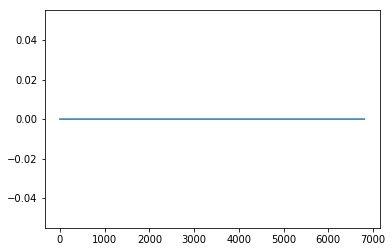

In [29]:
fms.getDataframe()['DIV_HID_BULL_MACD'].plot()

### Indicator based API

In [9]:
# load dataframe
df = fms.loadCSV('../csv_data/EURUSD_H4.csv', sep=';')
fms.loadDataframe(df)
_df = fms.buildIndicators()
fms.plotIndicators()

In [ ]:
fig = go.Figure(data=[fms.trace_ohlc, fms.trace_zigzag])
fig['layout'].update(height=600, title='Bollinger indicators')
fig['layout'].update(shapes=fms.trend_shapes)
py.iplot(fig, filename='simple_ohlc')


### New bar update

In [26]:
# load dataframe
df = fms.loadCSV('../csv_data/EURUSD_H4.csv', sep=';')
_df1 = df[:-1].copy()
fms.loadDataframe(_df1)
_df2 = fms.buildIndicators()
_df2.tail()

,TIME,OPEN,HIGH,LOW,CLOSE,TICKVOL,VOL,SPREAD,BOLLINGER_HI,BOLLINGER_MA,...,DIV_REG_BULL_RSI,DIV_REG_BULL_RSI_FROM,DIV_DOUB_HID_BEAR_RSI,DIV_DOUB_HID_BEAR_RSI_FROM,DIV_HID_BEAR_RSI,DIV_HID_BEAR_RSI_FROM,DIV_DOUB_HID_BULL_RSI,DIV_DOUB_HID_BULL_RSI_FROM,DIV_HID_BULL_RSI,DIV_HID_BULL_RSI_FROM
6520,2019-05-22 04:00:00,1.11608,1.11656,1.11533,1.11553,3295,0,0,1.116355,1.115805,...,0,0,0,0,0,0,0,0,0,0
6521,2019-05-22 08:00:00,1.11553,1.11638,1.11486,1.11594,10759,0,0,1.116145,1.115735,...,0,0,0,0,0,0,0,0,0,0
6522,2019-05-22 12:00:00,1.11594,1.11804,1.11579,1.11669,11949,0,0,1.117065,1.116315,...,0,0,0,0,0,0,0,0,0,0
6523,2019-05-22 16:00:00,1.11669,1.11689,1.11509,1.11569,15134,0,0,1.117190,1.116190,...,0,0,0,0,0,0,0,0,0,0
6524,2019-05-22 20:00:00,1.11569,1.11636,1.11495,1.11495,5914,0,0,1.116060,1.115320,...,0,0,0,0,0,0,0,0,0,0


In [27]:
row = df.iloc[-1].copy()
_df3 = fms.updateIndicators(row)
_df3.tail()

,TIME,OPEN,HIGH,LOW,CLOSE,TICKVOL,VOL,SPREAD,BOLLINGER_HI,BOLLINGER_MA,...,DIV_REG_BULL_RSI,DIV_REG_BULL_RSI_FROM,DIV_DOUB_HID_BEAR_RSI,DIV_DOUB_HID_BEAR_RSI_FROM,DIV_HID_BEAR_RSI,DIV_HID_BEAR_RSI_FROM,DIV_DOUB_HID_BULL_RSI,DIV_DOUB_HID_BULL_RSI_FROM,DIV_HID_BULL_RSI,DIV_HID_BULL_RSI_FROM
6521,2019-05-22 08:00:00,1.11553,1.11638,1.11486,1.11594,10759,0,0,1.116145,1.115735,...,0,0,0,0,0,0,0,0,0,0
6522,2019-05-22 12:00:00,1.11594,1.11804,1.11579,1.11669,11949,0,0,1.117065,1.116315,...,0,0,0,0,0,0,0,0,0,0
6523,2019-05-22 16:00:00,1.11669,1.11689,1.11509,1.11569,15134,0,0,1.117190,1.116190,...,0,0,0,0,0,0,0,0,0,0
6524,2019-05-22 20:00:00,1.11569,1.11636,1.11495,1.11495,5914,0,0,1.116060,1.115320,...,0,0,0,0,0,0,0,0,0,0
6525,2019-05-23 00:00:00,1.11495,1.11571,1.11495,1.11525,3558,0,0,1.115400,1.115100,...,0,0,0,0,0,0,0,0,0,0
